# Genereren van Pseudo-Random Getallen

In [1]:
import random

import scripts.RandomNumberGenerator as RNG
from scipy.stats import chisquare

Het genereren van een random seed gebaseerd op het aantal nanoseconden achter de komma:

In [2]:
RNG.generate_seed()

17671918869018554

## Random Number Generator Maken
Het genereren van Pseudo Random getallen door middel van een aangepaste versie van de midsquare: de endsquare

In [3]:
data = RNG.generator_endsquare(samples=10_000, seed=RNG.generate_seed())
print(data)

Seed: 18565082550048828, 17
[0.09516758 0.45231947 0.21552782 ... 0.99560819 0.26255218 0.47836018]


## Hypotheses opstellen

> H0: De RNG is niet willekeurig  
> H1: De RNG is willekeurig  
> $\alpha$: 0.05

## Random Number Generator Testen

### Test 1: visueel vergelijken met ingebouwde RNG Python
Het genereren van de distributie van de eigen Pseudo Random Number Generator. Tevens worden een zelfde hoeveelheid getallen doormiddel van de ingebouwde `random.uniform(0, 1)` functie getekend ter vergelijking.

Op het eerste oog lijkt de verdeling relatief uniform en zijn alle 10.000 waardes uniek. De verdeling lijkt erg op de verdeling van Python zelf, dit is veelbelovend. Echter is een visuele vergelijking niet genoeg om te bewijzen dat de verdeling uniform is.

Seed: 1677381992340088, 16


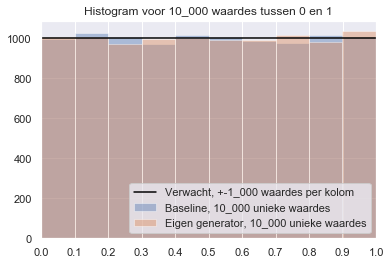

In [4]:
RNG.plot_distribution(samples=10_000)

## Test 2: Chi$^2$ toets
De Chi$^2$ toets wordt uitgevoerd op de zojuist gegenereerde data en op data gegenereerd met Python's eigen `random.unifom(0,1)`-functie. Te zien is dat beiden een P-waarde van 1 hebben. Van beiden sets valt _met aan zekerheid grenzende waarschijnlijkheid_ te zeggen dat ze uniform verdeeld zijn volgens de Chi$^2$ toets. Een P van 1 is immers meer dan 1 - $\alpha$. De grenswaarde is overschreden.

In [5]:
chisquare(data)

Power_divergenceResult(statistic=1671.6379332912843, pvalue=1.0)

In [6]:
baseline = []
for i in range(10_000):
    baseline.append(random.uniform(0,1))
chisquare(baseline)

Power_divergenceResult(statistic=1641.032608220828, pvalue=1.0)